# Import Librabries
First, Import Libraries such as Numpy and Pandas for Data cleaning and Manipulation.

In [1]:
import numpy as np
import pandas as pd

# Load Dataset
For this Project, We are using a small dataset which consists information on people applying for jobs.Load the dataset using the pandas method pd.read_csv. 

In [2]:
Dataset = pd.read_csv('OneDrive\Desktop\Week 3 - Data Cleaning (Pandas) - 1\Data-cleaning-for-beginners-using-pandas.csv')
print(Dataset.head())

   Index   Age     Salary  Rating       Location  Established Easy Apply
0      0  44.0  $44k-$99k     5.4       India,In         1999       TRUE
1      1  66.0  $55k-$66k     3.5    New York,Ny         2002       TRUE
2      2   NaN  $77k-$89k    -1.0    New York,Ny           -1         -1
3      3  64.0  $44k-$99k     4.4       India In         1988         -1
4      4  25.0  $44k-$99k     6.4  Australia Aus         2002         -1


# Handling Missing Values
Now, After Loading the Dataset we have to check for the missing values and deal with them. Generally, If the dataset is large we remove the missing or Null values from the dataset but In this case the dataset is quite small so instead of removing them we have to deal with them in another way.

In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


In [4]:
Dataset.isnull().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


As there are 7 missing values in age column, we can impute the missing values with the help of mean or median.First,We have to convert the age column into numeric format then we can calculate the median of the age column.

In [5]:
Dataset['Age'] = pd.to_numeric(Dataset['Age'],errors='coerce')
median_age = Dataset['Age'].median()
Dataset['Age'].fillna(median_age,inplace=True)



In [6]:
print(Dataset)

    Index   Age      Salary  Rating       Location  Established Easy Apply
0       0  44.0   $44k-$99k     5.4       India,In         1999       TRUE
1       1  66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
2       2  39.5   $77k-$89k    -1.0    New York,Ny           -1         -1
3       3  64.0   $44k-$99k     4.4       India In         1988         -1
4       4  25.0   $44k-$99k     6.4  Australia Aus         2002         -1
5       5  44.0   $77k-$89k     1.4       India,In         1999       TRUE
6       6  21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7       7  44.0   $44k-$99k    -1.0  Australia Aus           -1         -1
8       8  35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9       9  22.0   $44k-$99k     7.7       India,In           -1       TRUE
10     10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11     11  44.0   $10k-$49k     6.7       India,In         2009         -1
12     12  39.5   $44k-$9

# Data Cleaning / Transformation
Now, As you can see that the Salary column have a very inconsistent format so we have to perform some standardization and formatting.The current format appears to include dollar signs ('$'), 'k' for thousands, and a range specified as "low-high". We can change the range representation of salary into average of that range so that we can perform a consistent analysis.

In [7]:
Dataset['Salary'] = Dataset['Salary'].replace({'\$': '', 'k': '000', '-': '-'},regex=True)
def calculate_average_salary(Salary):
    if isinstance(Salary, str) and '-' in Salary:
        lower, upper = map(float, Salary.split('-'))
        return (lower + upper) / 2
    return Salary
Dataset['Salary'] = Dataset['Salary'].apply(calculate_average_salary)

In [15]:
print(Dataset)

    Index   Age   Salary  Rating   Location    Established Easy Apply
0       0  44.0  71500.0     5.4      India           1999       TRUE
1       1  66.0  60500.0     3.5   New York           2002       TRUE
2       2  39.5  83000.0     4.2   New York  Not available      False
3       3  64.0  71500.0     4.4      India           1988      False
4       4  25.0  71500.0     6.4  Australia           2002      False
5       5  44.0  83000.0     1.4      India           1999       TRUE
6       6  21.0  71500.0     0.0   New York  Not available      False
7       7  44.0  71500.0     4.2  Australia  Not available      False
8       8  35.0  71500.0     5.4   New York  Not available      False
9       9  22.0  71500.0     7.7      India  Not available       TRUE
10     10  55.0  29500.0     5.4      India           2008       TRUE
11     11  44.0  29500.0     6.7      India           2009      False
12     12  39.5  71500.0     0.0      India           1999      False
13     13  25.0  715

Now, If we look at the location column we can see inconsistency with location name like there are some spaces between Name and the abbreviation, some comma between name and abbreviations. This create problem when doing the analysis so it's better to remove the white spaces, comma's , abbreviations so that all the values becomes consistent. 

In [9]:
Dataset['Location'] = Dataset['Location'].str.replace(',', '').str.strip()
abbreviations_to_remove = ['In', 'Ny', 'Aus']
for abbreviation in abbreviations_to_remove:
     Dataset['Location'] = Dataset['Location'].apply(lambda x: x[:-len(abbreviation)] if x.endswith(abbreviation) else x).str.strip()

Rating column consists of rating of the company out of 10 but if we look at the entries there are some entries with the values '-1' which does not any sense because there are no rating below 0 so we can assume that '-1' depicts that the ratings for these companies are not available. Droping these entries will affect the analysis because of the size of dataset. We can replace these values with the mean or median of the column.

In [10]:
median_rating = Dataset['Rating'].median()
Dataset['Rating'].replace(-1,median_rating,inplace=True)
Dataset['Rating'].fillna(median_rating,inplace=True)

Established year column have some entries with values '-1' as well but we can not replace with mean or median because the values are years format so we can assume that the establishment year of these companies are not available so '-1' are used as placeholders. We can replace these values with 'Not available'.

In [11]:
Dataset['Established'].replace(-1,'Not available',inplace=True)

Easy Apply column is a boolean type so all the values are in True and False so we can assume that the entries with the values '-1' are False. We can simply replace the '-1' values with False.

In [12]:
Dataset['Easy Apply'] = Dataset['Easy Apply'].replace([-1, '-1', 'Not Available', 'Not Applicable', 'False'], False, regex=True)

# Handling Outliers
Now, We have to check for the outliers in columns like Age, Rating, Salary because extreme low or high values might affect our analysis. So we have to make sure that all the values are lies with specific range.

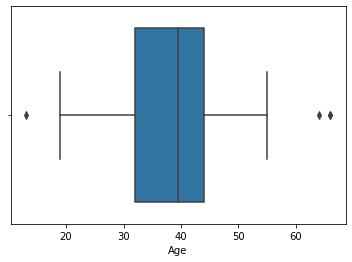

In [13]:
import seaborn as sns
sns.boxplot(x=Dataset['Age'])

We can find the outliers in 'Salary' column by calcualting the z-score. If the values corresponds false that means it is not a outlier but if it is true then it is a outlier.

In [14]:
from scipy.stats import zscore
z_scores = zscore(Dataset['Salary'])
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
Name: Salary, dtype: bool
